In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('style/advocate.mplstyle')
%matplotlib inline
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [2]:
rh_blocks_nola = gpd.read_file('processed data/rh_blocks_nola_flood_GT3.geojson')
rh_neighborhoods = gpd.read_file('processed data/rh_neighborhoods_flood_GT3.geojson')
rh_neighborhoods = rh_neighborhoods.rename(columns = {'index' : 'neighborhood'})
rh_neighborhoods = rh_neighborhoods.set_index('neighborhood')

## Maps

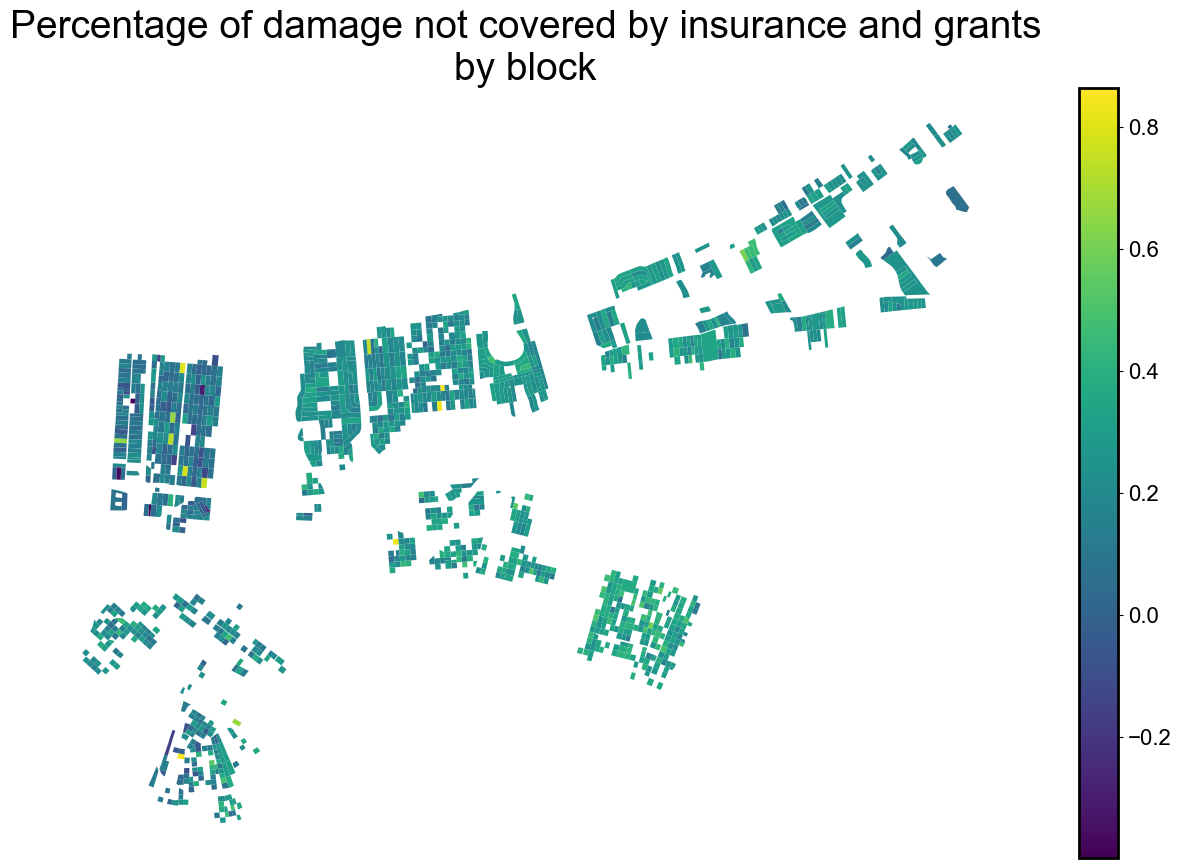

In [3]:
fig, ax = plt.subplots(figsize=(17,10))
rh_blocks_nola.plot(column='uncovered_percent', ax=ax, legend=True)
plt.title('Percentage of damage not covered by insurance and grants\nby block')
plt.grid(False)
plt.axis('off')
plt.show()
plt.close()

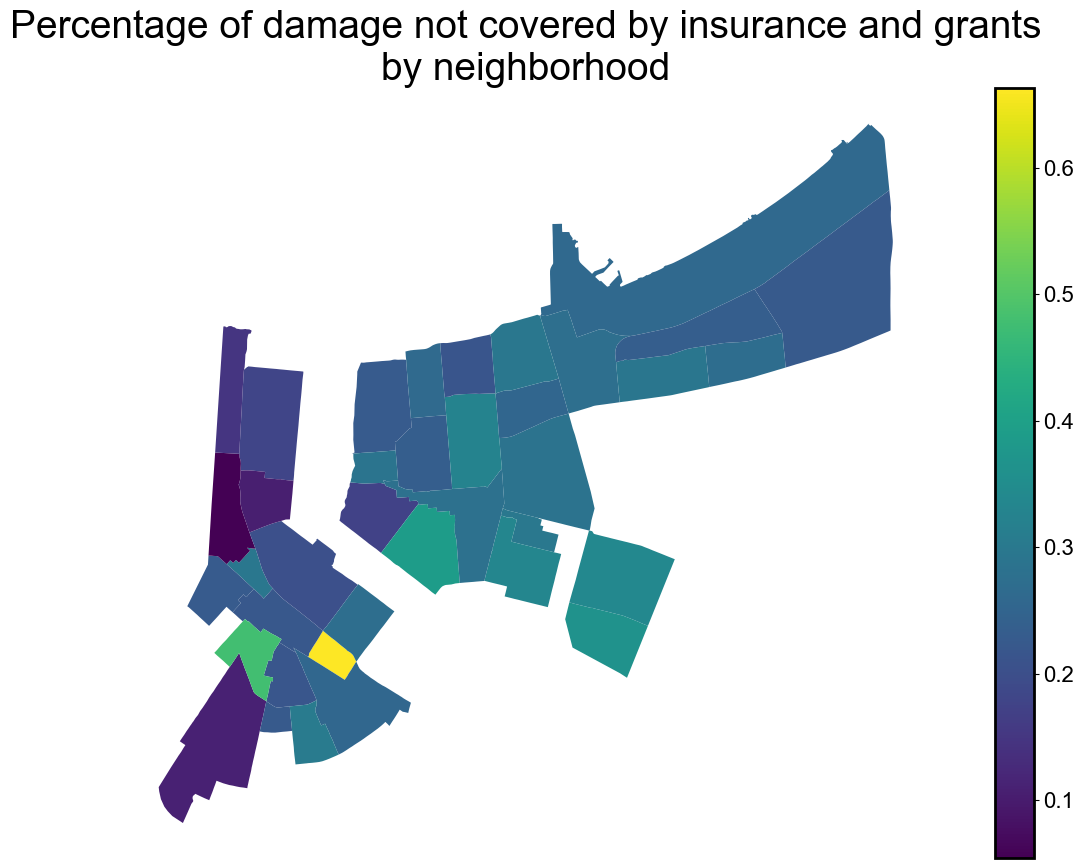

In [4]:
fig, ax = plt.subplots(figsize=(17,10))
rh_neighborhoods.plot(column='uncovered_percent', ax=ax, legend=True)
plt.title('Percentage of damage not covered by insurance and grants\nby neighborhood')
plt.grid(False)
plt.axis('off')
plt.show()
plt.close()

### Percent of uncovered damage by blocks and neighborhoods

There is at least a slight relationship between the percentage of damage not covered by grants or insurance and the percentage of a blocks population that is not White.

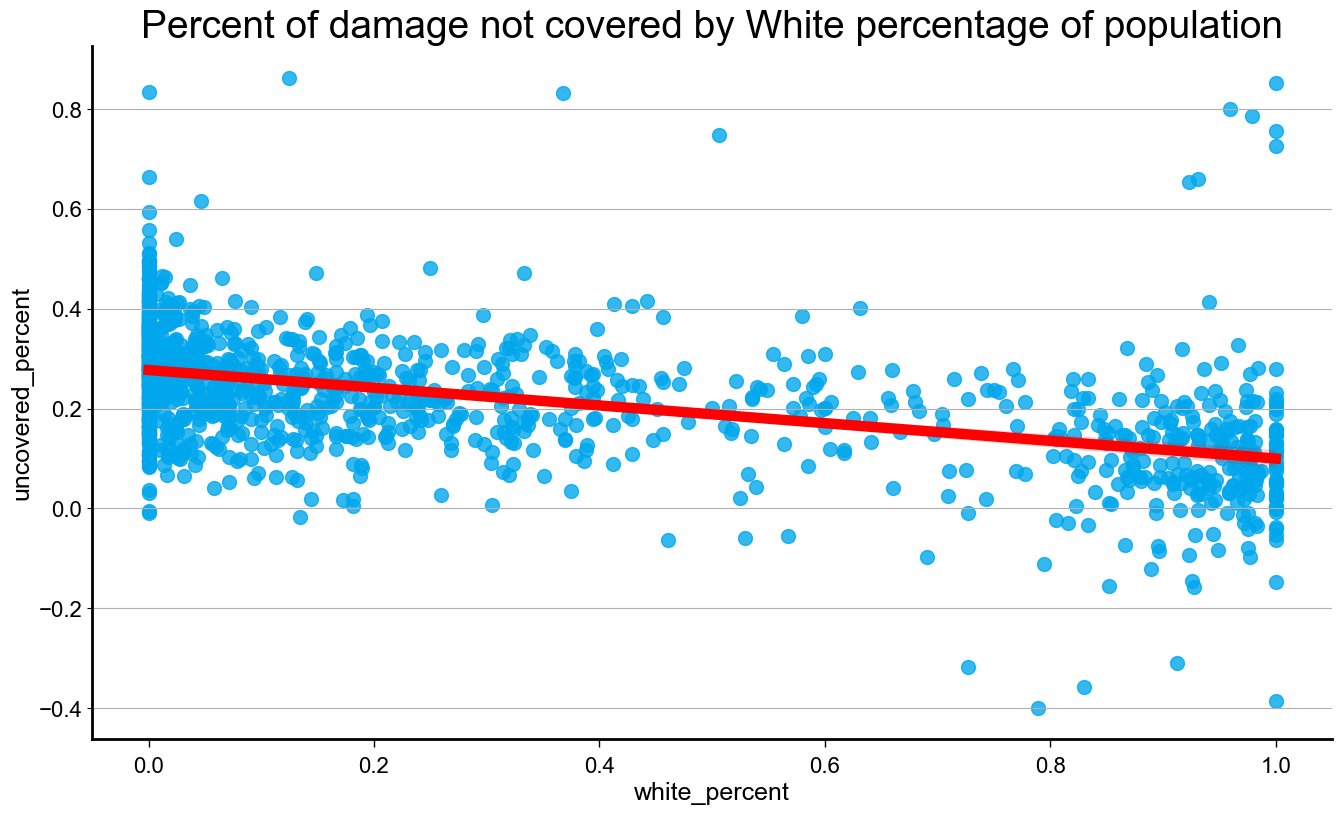

In [5]:
fig, ax = plt.subplots()
sns.regplot(rh_blocks_nola, x='white_percent', y='uncovered_percent', line_kws={'color' : 'red'}, ax=ax)
plt.title('Percent of damage not covered by White percentage of population')
plt.show()
plt.close()

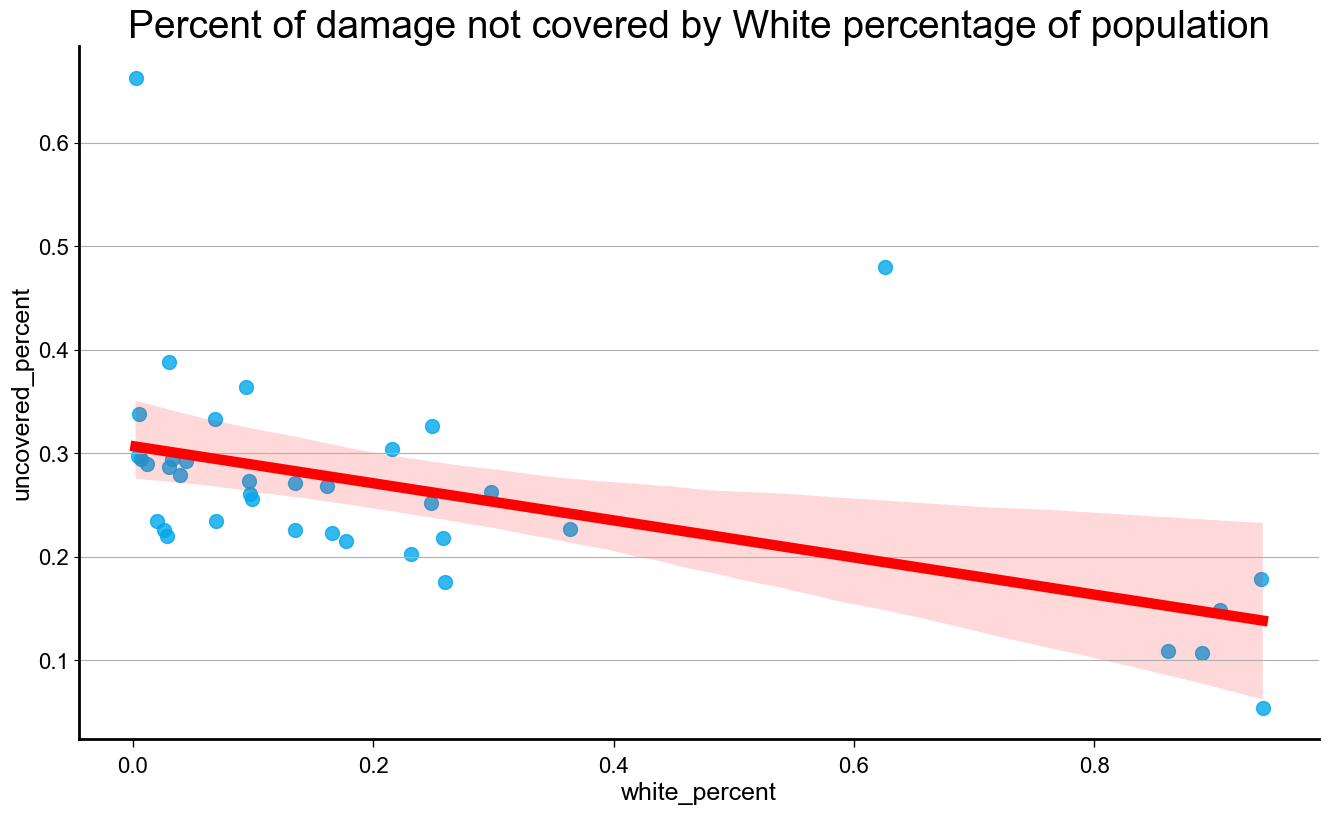

In [6]:
fig, ax = plt.subplots()
sns.regplot(rh_neighborhoods, x='white_percent', y='uncovered_percent', line_kws={'color' : 'red'}, ax=ax)
plt.title('Percent of damage not covered by White percentage of population')
plt.show()
plt.close()

## Damage and compensation by neighborhood

In [7]:
(
    rh_neighborhoods[rh_neighborhoods['damage_sum']>0][
        [   'damage_sum', 
            'grant_insurance_sum', 
            'grant_insurance_mean', 
            'uncovered_sum', 
            'uncovered_mean', 
            'uncovered_percent', 
            'white_percent'
    ]
]
.sort_values(by='uncovered_percent')
)

,damage_sum,grant_insurance_sum,grant_insurance_mean,uncovered_sum,uncovered_mean,uncovered_percent,white_percent
neighborhood,,,,,,,
LAKEWOOD,"27,771,533.61","26,263,319.71","295,093.48","1,508,213.90","16,946.22",0.05,0.94
NAVARRE,"83,730,193.27","74,803,993.60","200,546.90","8,926,199.67","23,930.83",0.11,0.89
AUDUBON,"8,179,229.39","7,286,615.12","177,722.32","892,614.27","21,771.08",0.11,0.86
WEST END,"172,131,805.43","146,596,840.34","225,187.16","25,534,965.09","39,224.22",0.15,0.91
FAIRGROUNDS,"11,788,571.47","9,722,515.90","151,914.31","2,066,055.57","32,282.12",0.18,0.26
LAKEVIEW,"541,337,816.08","444,920,096.69","241,410.80","96,417,719.39","52,315.64",0.18,0.94
MID-CITY,"77,964,112.26","62,173,136.69","161,909.21","15,790,975.57","41,122.33",0.20,0.23
MILNEBURG,"228,037,851.97","178,849,611.80","162,442.88","49,188,240.17","44,675.97",0.22,0.18
BROADMOOR,"152,938,541.39","119,575,253.06","170,578.11","33,363,288.33","47,593.85",0.22,0.26


## Additional Compensation Grants

The additional compensation grants did have an impact, particularly in neighborhoods with large amounts of damage that was not covered. But even with those grants, there were still large amounts of damage that went uncovered

In [8]:
wo_acg = rh_neighborhoods[rh_neighborhoods['damage_sum']>0][['compensation_sum', 'insurance_sum', 'damage_sum', 'all_grants_count']].apply(lambda x: (x['damage_sum'] - (x['compensation_sum']+x['insurance_sum']))/x['damage_sum'], axis=1).sort_values(ascending=False)
w_acg = rh_neighborhoods[rh_neighborhoods['damage_sum']>0]['uncovered_percent']

acg_compare = pd.concat([wo_acg.rename('Without ACG'), w_acg.rename('With ACG')], axis=1)
acg_compare['Difference'] = acg_compare['Without ACG'] - acg_compare['With ACG']
acg_compare.sort_values(by="Difference")

,Without ACG,With ACG,Difference
neighborhood,,,
LAKEWOOD,0.06,0.05,0.00
AUDUBON,0.11,0.11,0.00
MARLYVILLE - FONTAINEBLEAU,0.49,0.48,0.01
LAKEVIEW,0.19,0.18,0.01
WEST END,0.17,0.15,0.02
NAVARRE,0.13,0.11,0.02
FILMORE,0.29,0.23,0.07
FRERET,0.30,0.23,0.07
GENTILLY TERRACE,0.41,0.33,0.09


In [9]:
rh_neighborhoods[['uncovered_mean', 'white_percent']].dropna(axis=0, subset='uncovered_mean').sort_values(by='uncovered_mean', ascending=False)

,uncovered_mean,white_percent
neighborhood,,
B. W. COOPER,"179,910.67",0.00
MARLYVILLE - FONTAINEBLEAU,"174,400.70",0.63
SEVENTH WARD,"88,949.20",0.03
GENTILLY TERRACE,"79,128.56",0.25
HOLY CROSS,"76,928.34",0.09
LOWER NINTH WARD,"66,442.24",0.00
LITTLE WOODS,"64,733.63",0.10
MILAN,"64,527.69",0.22
PONTCHARTRAIN PARK,"62,333.46",0.01


In [10]:
rh_neighborhoods[['all_grants_count', 'damage_mean', 'uncovered_percent', 'white_percent']].dropna(axis=0, subset='damage_mean').sort_values(by='damage_mean')

,all_grants_count,damage_mean,uncovered_percent,white_percent
neighborhood,,,,
DESIRE AREA,195.00,"170,988.41",0.29,0.03
ST. CLAUDE,36.00,"181,333.02",0.33,0.07
FAIRGROUNDS,64.00,"184,196.43",0.18,0.26
HOLLYGROVE,603.00,"184,987.20",0.23,0.03
FRERET,40.00,"186,135.32",0.23,0.13
CENTRAL CITY,42.00,"188,718.51",0.26,0.10
FLORIDA AREA,364.00,"191,408.79",0.30,0.00
GERT TOWN,52.00,"193,032.26",0.22,0.03
DIXON,114.00,"194,257.71",0.29,0.03
